# Recurrent Neural Network - LSTM -  BTC

### Importing Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")
import ta

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

### Loading the Data

In [9]:
df = pd.read_csv("BTC-USD.csv")

#### Datetime Conversion

In [10]:
# Datetime conversion
df['Date'] = pd.to_datetime(df.Date)

# Setting the index
df.set_index('Date', inplace=True)

## Preprocessing Data
#### (adding technical indicators)

In [11]:
# Adding all the indicators
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Dropping everything else besides 'Close' and the Indicators
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis= 1, inplace=True)

/anaconda3/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/anaconda3/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [12]:
# Checking the new df with indicators
print(df.shape)

df.tail(10)

(2005, 69)


,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,8755.246094,8.522222e+11,290869079216,-0.029679,-2.089727e+12,-9.569684,-72.441276,-5.199719e+08,354.191336,299.972405,...,47.867243,19.184521,20.248288,-80.815479,-799.290323,8998.343282,-9.613389,-0.370287,-0.370974,1814.409558
2020-03-05,9078.762695,8.788612e+11,330567133813,-0.044336,4.351646e+10,166.485743,-53.538044,1.338227e+09,354.191336,308.656024,...,51.748405,41.035878,26.206956,-58.964122,-734.326853,9003.459999,-6.047894,3.695117,3.628484,1885.149234
2020-03-06,9122.545898,8.925038e+11,371394019463,0.020131,2.926615e+11,49.903434,-51.853186,1.663781e+09,354.191336,291.352043,...,53.564267,43.993137,34.737846,-56.006863,-626.021151,9006.092071,-8.080694,0.482260,0.481100,1894.722806
2020-03-07,8909.954102,8.613936e+11,335177089094,-0.031195,-8.490647e+11,-54.849611,-55.636946,-6.471077e+08,345.937262,289.464495,...,51.244736,29.634000,38.221005,-70.366000,-556.714829,9004.985849,-7.670542,-2.330400,-2.357983,1848.237789
2020-03-08,8108.116211,8.217034e+11,295203986974,-0.070590,-5.306619e+12,-1046.826168,-137.593074,-4.441318e+09,345.937262,341.427127,...,37.800594,0.155066,24.594068,-99.844934,-589.393325,8941.716660,-13.205179,-8.999349,-9.430353,1672.909065
2020-03-09,7923.644531,8.197206e+11,248266991166,-0.125490,-5.785466e+12,-598.335234,-176.835416,-4.665205e+09,345.937262,356.053946,...,35.172298,11.899609,13.896225,-88.100391,-720.298868,8862.213221,-10.168082,-2.275148,-2.301429,1632.572752
2020-03-10,7909.729492,8.023926e+11,206053050173,-0.094721,-5.042887e+12,31.985056,-159.039731,-1.142020e+09,345.329747,352.666764,...,34.430841,13.193606,8.416094,-86.806394,-872.216298,8793.680300,-9.958054,-0.175614,-0.175769,1629.530110
2020-03-11,7911.430176,8.311826e+11,244735812777,-0.087003,-4.313076e+12,-142.556797,-127.828976,-6.581640e+07,345.403997,348.200283,...,39.856198,17.615627,14.236281,-82.384373,-1077.377948,8733.955214,-8.775196,0.021501,0.021499,1629.901979
2020-03-12,4970.788086,7.810874e+11,190755455534,-0.167774,-2.637362e+13,-7970.760717,-681.828056,-2.005593e+10,345.403997,620.256475,...,20.638760,2.563857,11.124364,-97.436143,-1504.250212,7507.742890,-42.196837,-37.169539,-46.473018,986.905396


### Scaling

In [13]:
# Normalizing/Scaling the Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df.tail(10)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,0.443968,0.879902,0.344818,0.388325,0.599675,0.439389,0.383167,0.709651,0.003090,0.155729,...,0.443057,0.191845,0.182023,0.191845,0.314324,0.532195,0.230157,0.774617,0.668292,0.443968
2020-03-05,0.460713,0.907392,0.391826,0.375572,0.652354,0.441017,0.384392,0.777151,0.003090,0.160237,...,0.500401,0.410359,0.243880,0.410359,0.320713,0.532506,0.254399,0.810384,0.726268,0.460713
2020-03-06,0.462980,0.921471,0.440170,0.431666,0.658506,0.439939,0.384502,0.788977,0.003090,0.151254,...,0.527231,0.439931,0.332438,0.439931,0.331365,0.532665,0.240578,0.782118,0.680643,0.462980
2020-03-07,0.451976,0.889366,0.397284,0.387007,0.630312,0.438970,0.384256,0.705033,0.000212,0.150274,...,0.492960,0.296340,0.368597,0.296340,0.338182,0.532598,0.243367,0.757372,0.639488,0.451976
2020-03-08,0.410471,0.848408,0.349951,0.352728,0.520236,0.429799,0.378943,0.567207,0.000212,0.177250,...,0.294322,0.001551,0.227136,0.001551,0.334968,0.528760,0.205737,0.698698,0.536968,0.410471
2020-03-09,0.400923,0.846361,0.294372,0.304959,0.508411,0.433945,0.376399,0.559074,0.000212,0.184844,...,0.255488,0.118996,0.116082,0.118996,0.322093,0.523936,0.226386,0.757858,0.640308,0.400923
2020-03-10,0.400202,0.828480,0.244386,0.331732,0.526748,0.439773,0.377553,0.687055,0.000000,0.183085,...,0.244533,0.131936,0.059193,0.131936,0.307151,0.519778,0.227814,0.776330,0.671121,0.400202
2020-03-11,0.400290,0.858190,0.290191,0.338447,0.544771,0.438159,0.379576,0.726149,0.000026,0.180766,...,0.324693,0.176156,0.119612,0.176156,0.286973,0.516155,0.235856,0.778064,0.673981,0.400290
2020-03-12,0.248078,0.806494,0.226272,0.268167,0.000000,0.365782,0.343660,0.000000,0.000026,0.322003,...,0.040755,0.025639,0.087308,0.025639,0.244989,0.441761,0.008623,0.450856,0.000000,0.248078


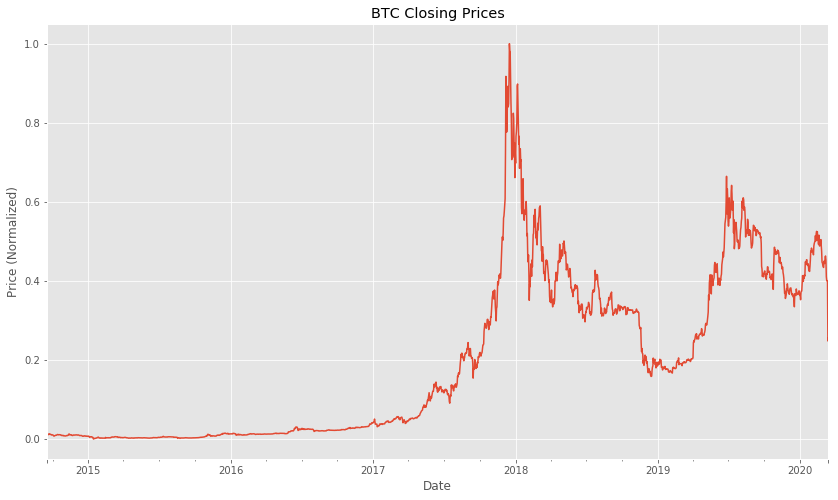

In [16]:
# Plotting the Closing Prices
df['Close'].plot(figsize=(14,8))
plt.title("BTC Closing Prices")
plt.ylabel("Price (Normalized)")
plt.show()

### Functions to prepare the data for LSTM

In [23]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current 
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [24]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [25]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

### Splitting the Data

In [26]:
# How many periods looking back to learn
n_per_in  = 30

# How many periods to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))


## Modeling - LSTM (RNN)

### Creating the Neural Network

In [62]:
# Instatiating the model
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=6, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 30, 30)            3840      
_________________________________________________________________
lstm_69 (LSTM)               (None, 30, 12)            2064      
_________________________________________________________________
lstm_70 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_71 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_72 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_73 (LSTM)               (None, 30, 12)            1200      
_________________________________________________________________
lstm_74 (LSTM)               (None, 30, 12)          

In [63]:
# Compiling the data with selected specifications
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Fitting and Training the RNN

In [64]:
res = model.fit(X, y, epochs=800, batch_size=32, validation_split=0.1)

Train on 864 samples, validate on 97 samples
Epoch 1/800
864/864 [==============================] - 6s 7ms/step - loss: 0.0907 - accuracy: 0.0671 - val_loss: 0.0835 - val_accuracy: 0.0515
Epoch 2/800
864/864 [==============================] - 3s 4ms/step - loss: 0.0474 - accuracy: 0.0660 - val_loss: 0.0283 - val_accuracy: 0.0515
Epoch 3/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0353 - accuracy: 0.0764 - val_loss: 0.0188 - val_accuracy: 0.0722
Epoch 4/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0293 - accuracy: 0.0752 - val_loss: 0.0072 - val_accuracy: 0.0515
Epoch 5/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0163 - accuracy: 0.1123 - val_loss: 0.0030 - val_accuracy: 0.0722
Epoch 6/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.0833 - val_loss: 0.0029 - val_accuracy: 0.0515
Epoch 7/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0125 - accuracy: 0.0

Epoch 114/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.2106 - val_loss: 0.0034 - val_accuracy: 0.0309
Epoch 115/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0016 - accuracy: 0.1736 - val_loss: 0.0034 - val_accuracy: 0.2680
Epoch 116/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.1806 - val_loss: 0.0038 - val_accuracy: 0.1237
Epoch 117/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.1968 - val_loss: 0.0033 - val_accuracy: 0.1340
Epoch 118/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.1910 - val_loss: 0.0039 - val_accuracy: 0.2680
Epoch 119/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.1968 - val_loss: 0.0042 - val_accuracy: 0.2474
Epoch 120/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.1736 - val_loss: 0.0039 - val_ac

864/864 [==============================] - 3s 3ms/step - loss: 7.8978e-04 - accuracy: 0.2477 - val_loss: 0.0034 - val_accuracy: 0.2784
Epoch 226/800
864/864 [==============================] - 3s 3ms/step - loss: 9.6018e-04 - accuracy: 0.2546 - val_loss: 0.0035 - val_accuracy: 0.2474
Epoch 227/800
864/864 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 0.2674 - val_loss: 0.0033 - val_accuracy: 0.2784
Epoch 228/800
864/864 [==============================] - 3s 3ms/step - loss: 0.0012 - accuracy: 0.2396 - val_loss: 0.0031 - val_accuracy: 0.3402
Epoch 229/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.2593 - val_loss: 0.0038 - val_accuracy: 0.2887
Epoch 230/800
864/864 [==============================] - 2s 3ms/step - loss: 9.9190e-04 - accuracy: 0.2431 - val_loss: 0.0029 - val_accuracy: 0.2680
Epoch 231/800
864/864 [==============================] - 2s 3ms/step - loss: 9.5123e-04 - accuracy: 0.2465 - val_loss: 0.0033 - val_

864/864 [==============================] - 3s 3ms/step - loss: 6.0720e-04 - accuracy: 0.2882 - val_loss: 0.0033 - val_accuracy: 0.2990
Epoch 336/800
864/864 [==============================] - 3s 3ms/step - loss: 6.5680e-04 - accuracy: 0.2755 - val_loss: 0.0031 - val_accuracy: 0.2784
Epoch 337/800
864/864 [==============================] - 3s 3ms/step - loss: 6.4309e-04 - accuracy: 0.2801 - val_loss: 0.0029 - val_accuracy: 0.2680
Epoch 338/800
864/864 [==============================] - 3s 3ms/step - loss: 6.5283e-04 - accuracy: 0.2720 - val_loss: 0.0030 - val_accuracy: 0.2887
Epoch 339/800
864/864 [==============================] - 3s 3ms/step - loss: 6.0114e-04 - accuracy: 0.2662 - val_loss: 0.0030 - val_accuracy: 0.2577
Epoch 340/800
864/864 [==============================] - 2s 3ms/step - loss: 7.8362e-04 - accuracy: 0.2697 - val_loss: 0.0051 - val_accuracy: 0.2577
Epoch 341/800
864/864 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.2500 - val_loss: 0.002

864/864 [==============================] - 2s 3ms/step - loss: 5.5690e-04 - accuracy: 0.2894 - val_loss: 0.0034 - val_accuracy: 0.3093
Epoch 446/800
864/864 [==============================] - 2s 3ms/step - loss: 5.6304e-04 - accuracy: 0.2789 - val_loss: 0.0032 - val_accuracy: 0.2887
Epoch 447/800
864/864 [==============================] - 2s 3ms/step - loss: 5.3126e-04 - accuracy: 0.2812 - val_loss: 0.0033 - val_accuracy: 0.2784
Epoch 448/800
864/864 [==============================] - 2s 3ms/step - loss: 5.2968e-04 - accuracy: 0.2917 - val_loss: 0.0031 - val_accuracy: 0.2990
Epoch 449/800
864/864 [==============================] - 2s 3ms/step - loss: 5.2533e-04 - accuracy: 0.2870 - val_loss: 0.0033 - val_accuracy: 0.2680
Epoch 450/800
864/864 [==============================] - 2s 3ms/step - loss: 5.4695e-04 - accuracy: 0.2546 - val_loss: 0.0033 - val_accuracy: 0.2784
Epoch 451/800
864/864 [==============================] - 2s 3ms/step - loss: 5.7358e-04 - accuracy: 0.2963 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 6.2833e-04 - accuracy: 0.2674 - val_loss: 0.0035 - val_accuracy: 0.3608
Epoch 556/800
864/864 [==============================] - 2s 3ms/step - loss: 5.5313e-04 - accuracy: 0.2593 - val_loss: 0.0035 - val_accuracy: 0.3608
Epoch 557/800
864/864 [==============================] - 2s 3ms/step - loss: 4.7656e-04 - accuracy: 0.2847 - val_loss: 0.0032 - val_accuracy: 0.2784
Epoch 558/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6196e-04 - accuracy: 0.2662 - val_loss: 0.0036 - val_accuracy: 0.3093
Epoch 559/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6357e-04 - accuracy: 0.2928 - val_loss: 0.0033 - val_accuracy: 0.3093
Epoch 560/800
864/864 [==============================] - 2s 3ms/step - loss: 4.7299e-04 - accuracy: 0.2789 - val_loss: 0.0035 - val_accuracy: 0.3093
Epoch 561/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6938e-04 - accuracy: 0.3009 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 4.5630e-04 - accuracy: 0.2859 - val_loss: 0.0039 - val_accuracy: 0.2887
Epoch 611/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4383e-04 - accuracy: 0.2986 - val_loss: 0.0036 - val_accuracy: 0.2990
Epoch 612/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4331e-04 - accuracy: 0.2616 - val_loss: 0.0036 - val_accuracy: 0.3196
Epoch 613/800
864/864 [==============================] - 2s 3ms/step - loss: 4.5045e-04 - accuracy: 0.2859 - val_loss: 0.0035 - val_accuracy: 0.2990
Epoch 614/800
864/864 [==============================] - 2s 3ms/step - loss: 5.5378e-04 - accuracy: 0.2975 - val_loss: 0.0033 - val_accuracy: 0.3196
Epoch 615/800
864/864 [==============================] - 3s 3ms/step - loss: 4.9361e-04 - accuracy: 0.2604 - val_loss: 0.0037 - val_accuracy: 0.2990
Epoch 616/800
864/864 [==============================] - 3s 3ms/step - loss: 4.5471e-04 - accuracy: 0.3102 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 5.3990e-04 - accuracy: 0.2801 - val_loss: 0.0036 - val_accuracy: 0.2371
Epoch 666/800
864/864 [==============================] - 2s 3ms/step - loss: 4.6940e-04 - accuracy: 0.2928 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 667/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4019e-04 - accuracy: 0.2847 - val_loss: 0.0040 - val_accuracy: 0.2680
Epoch 668/800
864/864 [==============================] - 2s 3ms/step - loss: 4.4406e-04 - accuracy: 0.2963 - val_loss: 0.0036 - val_accuracy: 0.3196
Epoch 669/800
864/864 [==============================] - 2s 3ms/step - loss: 4.2016e-04 - accuracy: 0.2847 - val_loss: 0.0037 - val_accuracy: 0.2990
Epoch 670/800
864/864 [==============================] - 2s 3ms/step - loss: 4.2103e-04 - accuracy: 0.2743 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 671/800
864/864 [==============================] - 2s 3ms/step - loss: 4.1375e-04 - accuracy: 0.3252 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 4.7331e-04 - accuracy: 0.3067 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 721/800
864/864 [==============================] - 2s 3ms/step - loss: 3.9090e-04 - accuracy: 0.3056 - val_loss: 0.0038 - val_accuracy: 0.2680
Epoch 722/800
864/864 [==============================] - 2s 3ms/step - loss: 3.8165e-04 - accuracy: 0.3380 - val_loss: 0.0041 - val_accuracy: 0.2990
Epoch 723/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7372e-04 - accuracy: 0.2674 - val_loss: 0.0034 - val_accuracy: 0.2577
Epoch 724/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7645e-04 - accuracy: 0.3252 - val_loss: 0.0037 - val_accuracy: 0.3299
Epoch 725/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7543e-04 - accuracy: 0.3021 - val_loss: 0.0035 - val_accuracy: 0.2990
Epoch 726/800
864/864 [==============================] - 2s 3ms/step - loss: 3.9643e-04 - accuracy: 0.2674 - val_loss: 0

864/864 [==============================] - 2s 3ms/step - loss: 3.4451e-04 - accuracy: 0.2824 - val_loss: 0.0035 - val_accuracy: 0.2784
Epoch 776/800
864/864 [==============================] - 2s 3ms/step - loss: 3.3560e-04 - accuracy: 0.3241 - val_loss: 0.0037 - val_accuracy: 0.1546
Epoch 777/800
864/864 [==============================] - 2s 3ms/step - loss: 3.3910e-04 - accuracy: 0.3009 - val_loss: 0.0036 - val_accuracy: 0.2990
Epoch 778/800
864/864 [==============================] - 3s 3ms/step - loss: 3.6528e-04 - accuracy: 0.2859 - val_loss: 0.0037 - val_accuracy: 0.1959
Epoch 779/800
864/864 [==============================] - 2s 3ms/step - loss: 3.4957e-04 - accuracy: 0.3252 - val_loss: 0.0038 - val_accuracy: 0.2165
Epoch 780/800
864/864 [==============================] - 2s 3ms/step - loss: 3.5301e-04 - accuracy: 0.3044 - val_loss: 0.0036 - val_accuracy: 0.2887
Epoch 781/800
864/864 [==============================] - 2s 3ms/step - loss: 3.7836e-04 - accuracy: 0.2928 - val_loss: 0

### Plotting the Accuracy and Loss

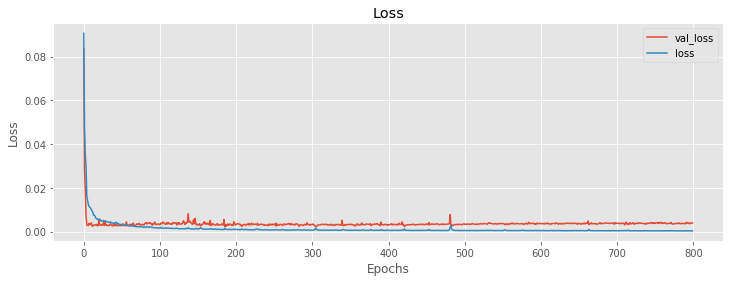

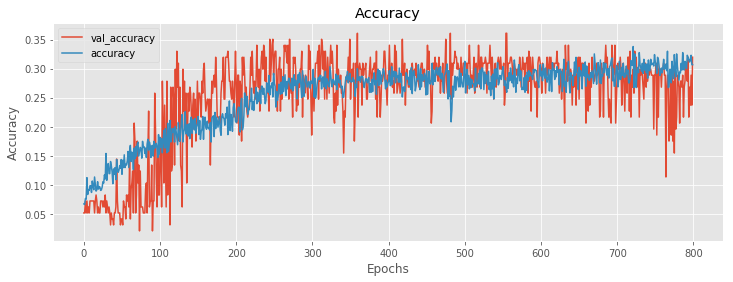

In [65]:
visualize_training_results(res)

## Visualizing the Predictions

### Validating the Model 
Plotting the difference between the Actual closing prices and the Predicted prices

Predicted Prices:
 [[7400.789307966416], [7241.380163940355], [7106.899924937646], [7172.888593383611], [7127.823633456216], [7228.137184418529], [7248.061391475402], [7264.6668333025145], [7504.581478017058], [7683.578527556711]]

Actual Prices:
 [[7397.796875], [7047.9169919999995], [7146.133789], [7218.371094], [7531.663573999999], [7463.105956999999], [7761.243651999999], [7569.629883], [7424.29248], [7321.988281]]


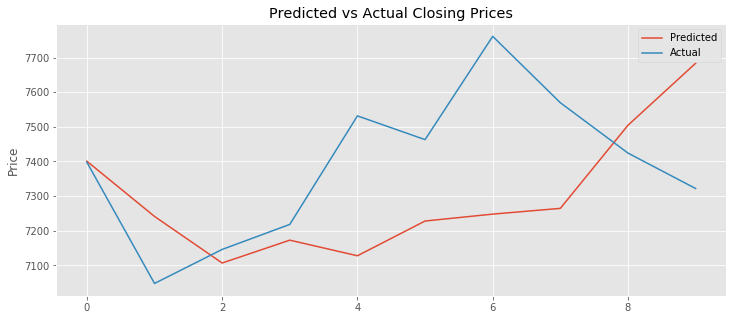

In [83]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.savefig("BTC_validation.png")
plt.show()

### Predicting/Forecasting the future prices

                  Close
2019-12-02  7750.527979
2019-12-03  7993.556731
2019-12-04  8048.777666
2019-12-05  8293.133372
2019-12-06  8278.055115
2019-12-07  8168.779239
2019-12-08  7833.326193
2019-12-09  7327.463403
2019-12-10  7053.108825
2019-12-11  6831.816325


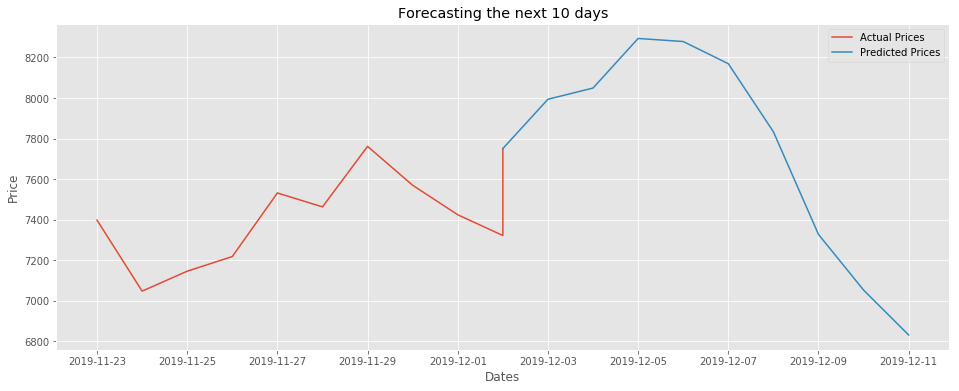

In [94]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.savefig("BTC_predictions.png")
plt.show()